<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/object_detect_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import torch
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [2]:
import zipfile
import os

zip_path = "/content/dataset_v5.zip"
extract_to = "/content/dataset"

os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File berhasil diekstrak ke: {extract_to}")

File berhasil diekstrak ke: /content/dataset


In [3]:
print("Struktur dataset:")
for root, dirs, files in os.walk(extract_to):
    level = root.replace(extract_to, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for file in files[:5]:  # Hanya tampilkan 5 file pertama untuk menjaga keringkasan
        print(f"{sub_indent}{file}")
    if len(files) > 5:
        print(f"{sub_indent}... dan {len(files)-5} file lainnya")

Struktur dataset:
dataset/
    dataset_v5/
        data.yaml
        README.roboflow.txt
        README.dataset.txt
        valid/
            images/
                caries-33-_png.rf.135791cecd1ddb489621ee2d7d485539.jpg
                caries-65-_png.rf.829c28226513dea5810298bab4c2888a.jpg
                caries-547-_png.rf.b7bb412be9b9f3b0fe7d8e97cfccd4a9.jpg
                Primary-Perio-with-Secondary-Endo-21-_JPG.rf.fdee2ba23fbeae9a3c68ecde3d10e31b.jpg
                caries-754-_png.rf.d37fa945a552815050d3f69adae2a6a4.jpg
                ... dan 159 file lainnya
            labels/
                caries-515-_png.rf.0a4881ffff4ec165d34887dfb6ec6ee2.txt
                caries-377-_png.rf.b900cede74fd13cca81b3be7b42e9d8f.txt
                caries-689-_png.rf.bee5af21c2b6e17713272d51f0b5e984.txt
                caries-419-_png.rf.83636b3d430d8305f7e390fe7609dd88.txt
                True-Combined-Lesions-14-_JPG.rf.ec09a0468e5723e9b9369ba7d2a580f1.txt
                ... dan 159 fi

In [4]:
# Path ke file konfigurasi dataset (data.yaml)
data_yaml_path = None

# Cari file data.yaml di direktori hasil ekstraksi
for root, dirs, files in os.walk(extract_to):
    for file in files:
        if file.lower() == 'data.yaml':
            data_yaml_path = os.path.join(root, file)
            break
    if data_yaml_path:
        break

if not data_yaml_path:
    # Jika tidak ditemukan, coba gunakan jalur default berdasarkan struktur umum dataset YOLO
    possible_paths = [
        os.path.join(extract_to, 'data.yaml'),
        os.path.join(extract_to, 'dataset', 'data.yaml'),
    ]

    for path in possible_paths:
        if os.path.exists(path):
            data_yaml_path = path
            break

print(f"File konfigurasi dataset: {data_yaml_path}")

File konfigurasi dataset: /content/dataset/dataset_v5/data.yaml


In [5]:
model = YOLO('yolov8n.pt')
print("Memulai training model...")
results = model.train(
    data=data_yaml_path,
    epochs=30,
    patience=5,
    batch=16,
)
print("Training selesai!")

Memulai training model...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/dataset_v5/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.

train: Scanning /content/dataset/dataset_v5/train/labels... 1308 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1308/1308 [00:00<00:00, 2068.46it/s]

train: New cache created: /content/dataset/dataset_v5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 390.8±159.5 MB/s, size: 14.4 KB)


val: Scanning /content/dataset/dataset_v5/valid/labels... 164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<00:00, 1499.78it/s]

val: New cache created: /content/dataset/dataset_v5/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.13G        1.2      1.626      1.501         41        640: 100%|██████████| 82/82 [00:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        164        357      0.632      0.595      0.652      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.62G      1.186       1.21      1.455         56        640: 100%|██████████| 82/82 [00:24<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all        164        357      0.733       0.77      0.794      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.64G      1.204      1.144      1.469         76        640: 100%|██████████| 82/82 [00:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        164        357      0.687      0.793      0.778      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.66G       1.18      1.056      1.441         76        640: 100%|██████████| 82/82 [00:24<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all        164        357      0.725      0.811      0.807      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.68G      1.173     0.9955      1.432         80        640: 100%|██████████| 82/82 [00:24<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        164        357      0.809      0.857      0.892      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.69G      1.128     0.9642      1.404         78        640: 100%|██████████| 82/82 [00:24<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        164        357      0.695      0.835       0.81      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.71G      1.109     0.9415      1.395         61        640: 100%|██████████| 82/82 [00:24<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        164        357      0.884      0.824      0.907      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.72G      1.086     0.9079      1.387         69        640: 100%|██████████| 82/82 [00:24<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        164        357      0.861       0.83      0.906       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.74G      1.074      0.875      1.365         86        640: 100%|██████████| 82/82 [00:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all        164        357      0.791      0.782      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.76G      1.059     0.8314      1.353         60        640: 100%|██████████| 82/82 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all        164        357      0.819      0.832      0.884      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.78G      1.057     0.8394      1.356         72        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        164        357      0.846      0.885      0.918      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.79G      1.031     0.8151      1.336         72        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        164        357      0.883      0.913      0.934       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.81G      1.031     0.7953      1.331         77        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        164        357      0.894      0.916       0.96      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.83G      1.005     0.7678      1.312         76        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        164        357      0.865      0.899      0.949      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.84G     0.9986     0.7447      1.312         64        640: 100%|██████████| 82/82 [00:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        164        357      0.938      0.895      0.963      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.86G     0.9713     0.7398      1.292         75        640: 100%|██████████| 82/82 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        164        357       0.89       0.93      0.961      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.88G     0.9705     0.7287      1.299         63        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]

                   all        164        357      0.906       0.91      0.961      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.89G     0.9476     0.7133      1.274         65        640: 100%|██████████| 82/82 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        164        357      0.911       0.93      0.965      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.91G     0.9549     0.7048      1.284         74        640: 100%|██████████| 82/82 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all        164        357      0.901      0.933      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.93G     0.9382     0.6939      1.276         75        640: 100%|██████████| 82/82 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        164        357      0.908      0.942      0.969      0.709


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.95G     0.8928     0.6094      1.327         31        640: 100%|██████████| 82/82 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        164        357       0.91      0.919      0.952      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.96G     0.8937     0.5714      1.324         34        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

                   all        164        357      0.904      0.927      0.961      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.98G     0.8494     0.5398      1.292         35        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        164        357       0.91      0.941      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         3G     0.8319     0.5283      1.286         31        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

                   all        164        357      0.929      0.922      0.972      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.02G     0.8437     0.5192      1.284         31        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        164        357      0.916      0.945      0.971      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.03G     0.8069     0.5024       1.27         27        640: 100%|██████████| 82/82 [00:21<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        164        357       0.94      0.926      0.973      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.05G     0.7942     0.4952      1.248         35        640: 100%|██████████| 82/82 [00:21<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        164        357      0.934      0.944      0.975      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.07G     0.7698     0.4679      1.232         24        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        164        357      0.938      0.941      0.979      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.08G     0.7556     0.4654      1.219         30        640: 100%|██████████| 82/82 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        164        357      0.929      0.956      0.978      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       3.1G     0.7507     0.4544       1.22         34        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        164        357      0.935       0.95      0.974      0.752



30 epochs completed in 0.215 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


                   all        164        357      0.929      0.956      0.978      0.756
Speed: 0.3ms preprocess, 2.4ms inference, 0.1ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train3
Training selesai!


In [6]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 756.0±488.1 MB/s, size: 34.1 KB)


val: Scanning /content/dataset/dataset_v5/valid/labels.cache... 164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]


                   all        164        357      0.929      0.956      0.978      0.755
Speed: 1.0ms preprocess, 7.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8164763750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03

In [10]:
def test_model_on_random_images():
    import random

    # Mendapatkan beberapa gambar contoh dari dataset test/validasi
    test_dir = None

    # Cari direktori test/validasi
    possible_test_dirs = [
        os.path.join(extract_to, 'test', 'images'),
        os.path.join(extract_to, 'tests', 'images'),
        os.path.join(extract_to, 'valid', 'images'),
        os.path.join(extract_to, 'val', 'images'),
        os.path.join(extract_to, 'validation', 'images'),
        os.path.join(extract_to, 'images', 'test'),
        os.path.join(extract_to, 'images', 'val'),
        os.path.join(extract_to, 'images', 'valid'),
    ]

    for dir_path in possible_test_dirs:
        if os.path.exists(dir_path):
            test_dir = dir_path
            break

    if not test_dir:
        print("Direktori test/validasi tidak ditemukan.")
        return

    # Ambil semua gambar yang valid
    all_images = []
    for file in os.listdir(test_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(test_dir, file))

    # Pilih 5 gambar secara acak jika tersedia lebih dari 5 gambar
    if len(all_images) > 5:
        sample_images = random.sample(all_images, 5)
    else:
        sample_images = all_images

    # Load model terlatih
    trained_model = YOLO(trained_model_path)

    # Lakukan prediksi pada gambar contoh
    for i, img_path in enumerate(sample_images):
        # Baca gambar asli
        orig_img = cv2.imread(img_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

        # Prediksi dengan model
        results = trained_model(img_path)

        # Buat salinan gambar untuk visualisasi deteksi
        det_img = orig_img.copy()

        # Tambahkan bounding box pada gambar hasil deteksi
        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()
            confs = result.boxes.conf.cpu().numpy()
            cls = result.boxes.cls.cpu().numpy().astype(int)
            names = result.names

            for box, conf, cl in zip(boxes, confs, cls):
                x1, y1, x2, y2 = box
                label = f"{names[cl]}: {conf:.2f}"
                cv2.rectangle(det_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                cv2.putText(det_img, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Tampilkan gambar asli dan hasil deteksi secara bersebelahan
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(orig_img)
        plt.title(f"Gambar Asli: {os.path.basename(img_path)}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(det_img)
        plt.title(f"Hasil Deteksi Gigi")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Simpan hasil deteksi
        save_path = f"detection_result_{i+1}.png"
        plt.savefig(save_path)
        print(f"Hasil deteksi disimpan ke {save_path}")

    print("Testing selesai!")

# Jalankan tes model pada 5 gambar acak
print("Menguji model pada 5 gambar acak dari dataset testing...")
test_model_on_random_images()

# Fungsi untuk validasi model
def validate_model():
    trained_model = YOLO('/content/runs/detect/train3/weights/best.pt')
    val_results = trained_model.val()
    print("Hasil validasi:")
    for metric, value in val_results.results_dict.items():
        print(f"{metric}: {value}")

print("Memvalidasi model...")
validate_model()

Menguji model pada 5 gambar acak dari dataset testing...
Direktori test/validasi tidak ditemukan.
Memvalidasi model...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1018.1±455.3 MB/s, size: 36.0 KB)


val: Scanning /content/dataset/dataset_v5/valid/labels.cache... 164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.25it/s]


                   all        164        357      0.929      0.956      0.978      0.755
Speed: 1.3ms preprocess, 5.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
Hasil validasi:
metrics/precision(B): 0.9291922974400135
metrics/recall(B): 0.9557202028720604
metrics/mAP50(B): 0.9775230621330209
metrics/mAP50-95(B): 0.7548869917137531
fitness: 0.7771505987556799


Saving caries-79-_png.rf.7cb1935b87c4b6596251153601882391.jpg to caries-79-_png.rf.7cb1935b87c4b6596251153601882391 (1).jpg
Saving caries-703-_png.rf.89f3cfee8a6d2b1b6c8181ba82df2580.jpg to caries-703-_png.rf.89f3cfee8a6d2b1b6c8181ba82df2580 (1).jpg
Saving Frame-240_jpg.rf.e937817cc9cdf35bf65fa0ac04ffde22.jpg to Frame-240_jpg.rf.e937817cc9cdf35bf65fa0ac04ffde22.jpg
Saving Primary-Endo-with-Secondary-Perio-80-_JPG.rf.7a7fb5592443bbc1399e24f5c5583def.jpg to Primary-Endo-with-Secondary-Perio-80-_JPG.rf.7a7fb5592443bbc1399e24f5c5583def.jpg
Saving True-Combined-Lesions-107-_JPG.rf.81ad9597cb8978f2f1c996319778083e.jpg to True-Combined-Lesions-107-_JPG.rf.81ad9597cb8978f2f1c996319778083e.jpg

image 1/1 /content/caries-79-_png.rf.7cb1935b87c4b6596251153601882391 (1).jpg: 640x640 3 tooths, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/caries-703-_png.rf.89f3cfee8a6d2b1b6c8181ba82df2580 (1).jpg: 640x640 3 tooths, 13.4ms


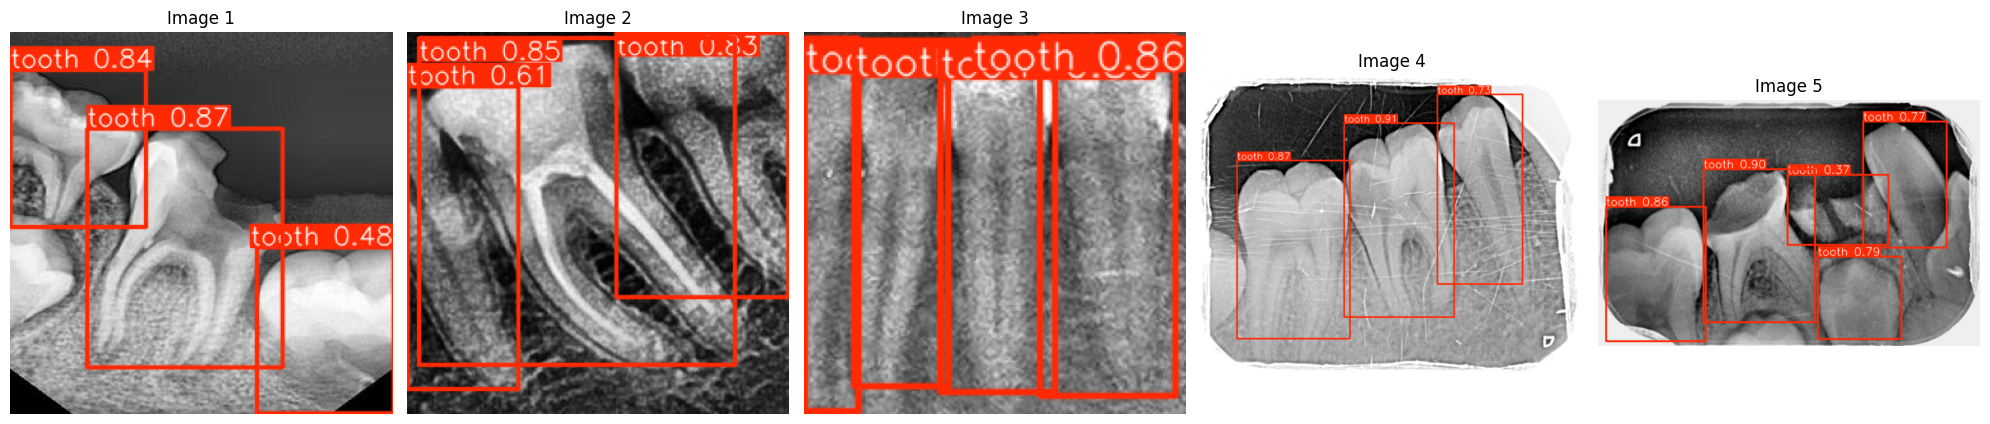

In [12]:
from google.colab import files
uploaded = files.upload()

import os
image_paths = list(uploaded.keys())

from ultralytics import YOLO

model = YOLO('/content/runs/detect/train3/weights/best.pt')

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(20, 10))

for i, path in enumerate(image_paths):
    results = model(path)
    result_img = results[0].plot()
    plt.subplot(1, len(image_paths), i+1)
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [13]:
import shutil

folder_path = "/content/runs"
zip_path = "/content/runs.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import shutil

folder_path = "/content/inference"
zip_path = "/content/inference.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>